In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
# I will be using datetime, latitude, depth, magnitude to train and test the data from a specific dates

In [3]:
file = pd.read_csv("clean_data1.csv")

In [4]:
file = file.loc[file['YEAR'] > 2000 ,:]
file["YEAR"].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [5]:
file = file[["YEAR", 'MONTH', 'EQ_PRIMARY','Depth','LATITUDE','LONGITUDE','REGION_CODE','DEATHS','INJURIES','HOUSES_DAMAGED' ]]

In [6]:
file.columns

Index(['YEAR', 'MONTH', 'EQ_PRIMARY', 'Depth', 'LATITUDE', 'LONGITUDE',
       'REGION_CODE', 'DEATHS', 'INJURIES', 'HOUSES_DAMAGED'],
      dtype='object')

In [7]:
#file.isnull().sum()
#file['YEAR'].unique()
file.describe()
             

,YEAR,MONTH,EQ_PRIMARY,Depth,LATITUDE,LONGITUDE,REGION_CODE,DEATHS,INJURIES,HOUSES_DAMAGED
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1.118000e+03
mean,2009.887299,6.549195,5.924687,31.443649,17.532572,51.051142,100.308587,512.977639,890.075134,8.967302e+03
std,5.332776,3.475041,1.091867,67.041883,24.296444,87.142654,56.356222,10126.881267,13148.761851,1.630123e+05
min,2001.000000,1.000000,0.000000,0.000000,-60.532000,-179.971000,0.000000,0.000000,0.000000,0.000000e+00
25%,2005.000000,4.000000,5.200000,10.000000,-1.351750,11.460000,40.000000,0.000000,0.000000,0.000000e+00
50%,2009.000000,7.000000,5.900000,14.000000,25.286000,73.247000,110.000000,0.000000,1.000000,0.000000e+00
75%,2014.000000,9.000000,6.700000,32.000000,36.800500,119.790750,160.000000,2.000000,30.000000,1.975000e+01
max,2019.000000,12.000000,9.100000,675.000000,64.004000,179.332000,170.000000,316000.000000,374171.000000,5.360000e+06


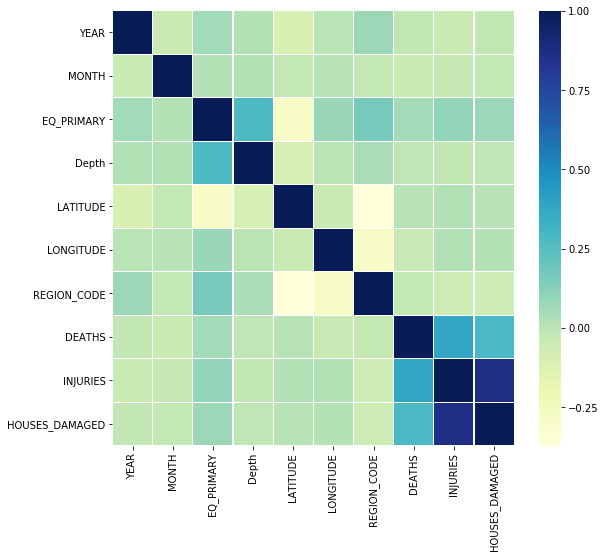

In [8]:
corrmat = file.corr()
f, ax = plt.subplots(figsize=(9,8))
sns.heatmap(corrmat, ax=ax , cmap= "YlGnBu", linewidths = 0.1)

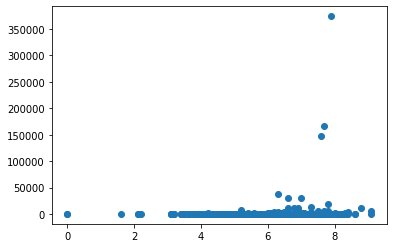

In [9]:
plt.scatter(file['EQ_PRIMARY'] ,file['INJURIES'])
plt.show()

In [10]:
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

In [11]:
file.head()

,YEAR,MONTH,EQ_PRIMARY,Depth,LATITUDE,LONGITUDE,REGION_CODE,DEATHS,INJURIES,HOUSES_DAMAGED
5032,2001,1.0,7.5,33.0,6.898,126.579,170.0,0.0,0.0,0.0
5033,2001,1.0,7.7,60.0,13.049,-88.660,100.0,844.0,4723.0,169632.0
5034,2001,1.0,7.7,16.0,23.419,70.232,60.0,20005.0,166836.0,339000.0
5035,2001,2.0,6.6,10.0,13.671,-88.938,100.0,315.0,3399.0,15706.0
5036,2001,2.0,5.6,33.0,29.513,101.129,30.0,3.0,109.0,60000.0


In [12]:
# I am predicting the eq_primary which is the magnitude of earthquakes using linear regression

In [13]:
predict = 'DEATHS'

In [27]:
x = np.array(file.drop([predict, 'YEAR', 'MONTH', 'REGION_CODE', 'DEATHS', 'INJURIES','HOUSES_DAMAGED'],1))

In [32]:
y = np.array(file[predict])
x_train, x_test , y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.1)

In [33]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)

-0.1323325112821998


In [34]:
predictions = linear.predict(x_test)
for x in range(len(predictions)):
    print(predictions[x], y_test[x])

1088.4443869377228 0.0
1062.8241696520636 0.0
-1846.9727864004426 0.0
1664.4054542178355 1.0
1427.9447859430784 0.0
-403.93367819176683 1.0
420.51771457160976 17.0
2017.3671494561295 0.0
-43.54006208554347 0.0
-887.1854746381136 0.0
2223.6011757867273 1.0
-94.05912225341717 0.0
-622.8051952964897 0.0
453.2228241963112 0.0
449.57751800861024 1.0
-1126.1309201822833 0.0
1321.5280075266528 0.0
2060.1167781990844 20005.0
1492.4462562929693 0.0
-12.086822924353783 0.0
738.4741378012004 1.0
2472.7338934083846 7.0
1320.3447537736074 1.0
33.243400915773236 0.0
373.2662695186118 0.0
1037.2595918268107 1.0
62.770303245268224 0.0
-500.7916807297288 0.0
518.512926987175 0.0
172.5762740795717 0.0
859.7039768970308 1.0
-357.620050893805 0.0
1221.3171919347487 0.0
156.3264609529342 0.0
1428.4647336687176 299.0
1193.3984058979759 0.0
1899.5639457964671 0.0
482.9034836646042 0.0
1269.8820050624054 3.0
782.7628482044001 0.0
1849.660962810307 0.0
316.73755227260517 0.0
313.18184724739604 0.0
2780.5268780